In [1]:
import anndata
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scanpy as sc
import pandas as pd
from sklearn.decomposition import PCA

def shared_neighbor_label(ad, label_obs_idx):
    sc.pp.neighbors(ad, n_neighbors=101, use_rep='projection') # 100 nearest neighbor of each cell
    m_ATAC_neighbors = [i.indices for i in ad.obsp['distances']] # neighbor idx for each cell
    neighbor_label = ad.obs.iloc[np.concatenate(m_ATAC_neighbors, axis=0), label_obs_idx] # label for all neighbors
    cell_label = ad.obs.iloc[np.repeat(np.arange(len(m_ATAC_neighbors)), [len(j) for j in m_ATAC_neighbors]), label_obs_idx] # label for all cells
    n_shared = (neighbor_label.values==cell_label.values).sum() / len(m_ATAC_neighbors)
    return n_shared

ad = anndata.read_h5ad('/home/yuanh/sc_basset/Buenrostro_2018/sc_peakset/raw/ad.h5ad')

/opt/conda/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


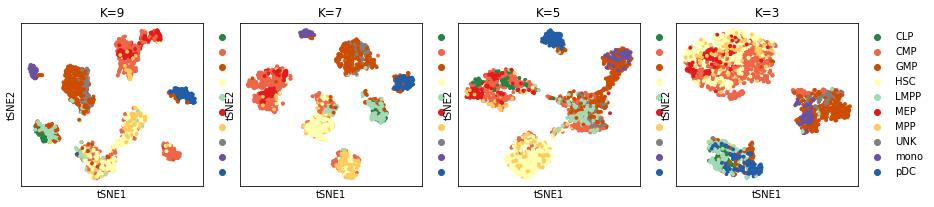

In [5]:
inputs = ['20220211_073107_x_dim=10_y_dim=20_alpha=10.0_beta=10.0_ratio=0.2', # K=9
           '20220211_075905_x_dim=10_y_dim=20_alpha=10.0_beta=10.0_ratio=0.2', # K=7
           '20220211_082604_x_dim=10_y_dim=20_alpha=10.0_beta=10.0_ratio=0.2', # K=5
           '20220211_085258_x_dim=10_y_dim=20_alpha=10.0_beta=10.0_ratio=0.2'] # K=3

Ks = [9, 7, 5, 3]
f, axs = plt.subplots(ncols=4, figsize=(15,3))
for i in range(4):
    embed = pd.read_csv('/home/yuanh/programs/source/scDEC/results/Buenrostro2018/%s/scDEC_embedding.csv'%inputs[i],
                        sep='\t', index_col=0).values
    ad.obsm['projection'] = embed
    sc.pp.neighbors(ad, use_rep='projection')
    sc.tl.tsne(ad, use_rep='projection')
    sc.pl.tsne(ad, color='label', ax=axs[i], show=False)
    axs[i].set_title('K=%d'%Ks[i])
f.savefig('select_K.pdf')

In [ ]:
i = 2
embed = pd.read_csv('/home/yuanh/programs/source/scDEC/results/Buenrostro2018/%s/scDEC_embedding.csv'%inputs[i],
                    sep='\t', index_col=0).values
pd.DataFrame(embed).to_csv('projection_bc.csv')

/opt/conda/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


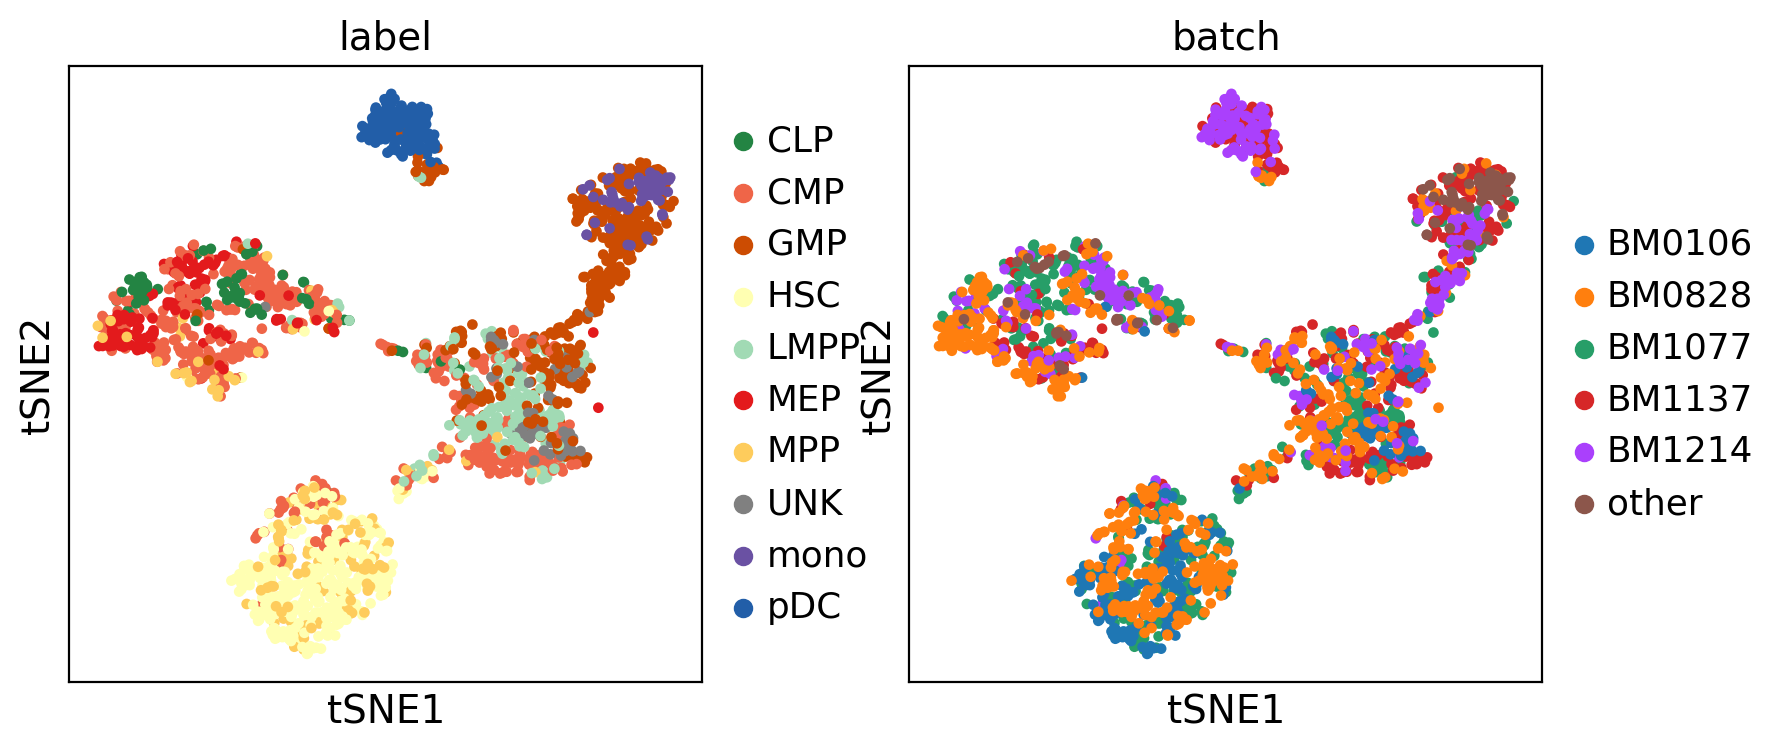

In [3]:
sc.set_figure_params(vector_friendly=True, format='pdf', dpi=100)

ad.obsm['projection'] = pd.read_csv('projection_bc.csv', index_col=0).values
sc.pp.neighbors(ad, use_rep='projection')
sc.tl.tsne(ad, use_rep='projection')

f = sc.pl.tsne(ad, color=['label', 'batch'], return_fig=True)
f.savefig('tsne_bc.pdf')